# Bande di Bollinger

Vedere le bande in OANDA

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [66]:
df = api.get_history(instrument = "EUR_USD", start = "2019-10-10", end = "2023-10-10", granularity = "H6", price = "M")
df = df.c.to_frame()

In [67]:
window = 30
dev = 2

In [68]:
df["SMA"]=df.c.rolling(window).mean()
df["devst"]=df.c.rolling(window).std()
df["lower"]=df.SMA-dev * df.devst
df["upper"]=df.SMA+dev*df.devst

In [69]:
df.head(50)

c       SMA     devst     lower     upper
time                                                                
2018-10-09 21:00:00  1.15071       NaN       NaN       NaN       NaN
2018-10-10 03:00:00  1.14857       NaN       NaN       NaN       NaN
2018-10-10 09:00:00  1.15334       NaN       NaN       NaN       NaN
2018-10-10 15:00:00  1.15184       NaN       NaN       NaN       NaN
2018-10-10 21:00:00  1.15599       NaN       NaN       NaN       NaN
2018-10-11 03:00:00  1.15450       NaN       NaN       NaN       NaN
2018-10-11 09:00:00  1.15579       NaN       NaN       NaN       NaN
2018-10-11 15:00:00  1.15927       NaN       NaN       NaN       NaN
2018-10-11 21:00:00  1.16045       NaN       NaN       NaN       NaN
2018-10-12 03:00:00  1.15861       NaN       NaN       NaN       NaN
2018-10-12 09:00:00  1.15607       NaN       NaN       NaN       NaN
2018-10-12 15:00:00  1.15567       NaN       NaN       NaN       NaN
2018-10-14 21:00:00  1.15482       NaN       NaN       NaN       NaN
2018-10-15 03:00:00  1.15718       NaN       NaN       NaN       NaN
2018-10-15 09:00:00  1.15840       NaN       NaN       NaN       NaN
2018-10-15 15:00:00  1.15776       NaN       NaN       NaN       NaN
2018-10-15 21:00:00  1.15727       NaN       NaN       NaN       NaN
2018-10-16 03:00:00  1.15859       NaN       NaN       NaN       NaN
2018-10-16 09:00:00  1.15801       NaN       NaN       NaN       NaN
2018-10-16 15:00:00  1.15734       NaN       NaN       NaN       NaN
2018-10-16 21:00:00  1.15604       NaN       NaN       NaN       NaN
2018-10-17 03:00:00  1.15652       NaN       NaN       NaN       NaN
2018-10-17 09:00:00  1.15290       NaN       NaN       NaN       NaN
2018-10-17 15:00:00  1.14991       NaN       NaN       NaN       NaN
2018-10-17 21:00:00  1.14998       NaN       NaN       NaN       NaN
2018-10-18 03:00:00  1.15172       NaN       NaN       NaN       NaN
2018-10-18 09:00:00  1.14891       NaN       NaN       NaN       NaN
2018-10-18 15:00:00  1.14508       NaN       NaN       NaN       NaN
2018-10-18 21:00:00  1.14592       NaN       NaN       NaN       NaN
2018-10-19 03:00:00  1.14480  1.154065  0.004390  1.145285  1.162845
2018-10-19 09:00:00  1.14964  1.154030  0.004422  1.145185  1.162874
2018-10-19 15:00:00  1.15112  1.154115  0.004338  1.145440  1.162790
2018-10-21 21:00:00  1.15074  1.154028  0.004379  1.145269  1.162787
2018-10-22 03:00:00  1.15151  1.154017  0.004385  1.145246  1.162788
2018-10-22 09:00:00  1.14699  1.153717  0.004551  1.144616  1.162818
2018-10-22 15:00:00  1.14631  1.153444  0.004744  1.143957  1.162931
2018-10-22 21:00:00  1.14609  1.153121  0.004906  1.143309  1.162932
2018-10-23 03:00:00  1.14660  1.152698  0.004904  1.142891  1.162506
2018-10-23 09:00:00  1.14589  1.152213  0.004830  1.142553  1.161873
2018-10-23 15:00:00  1.14697  1.151825  0.004765  1.142294  1.161356
2018-10-23 21:00:00  1.14634  1.151501  0.004798  1.141906  1.161096
2018-10-24 03:00:00  1.14157  1.151031  0.005059  1.140913  1.161148
2018-10-24 09:00:00  1.13953  1.150521  0.005421  1.139679  1.161363
2018-10-24 15:00:00  1.13901  1.149915  0.005661  1.138593  1.161237
2018-10-24 21:00:00  1.14100  1.149335  0.005653  1.138029  1.160641
2018-10-25 03:00:00  1.14090  1.148773  0.005625  1.137524  1.160023
2018-10-25 09:00:00  1.13791  1.148128  0.005726  1.136676  1.159580
2018-10-25 15:00:00  1.13737  1.147421  0.005700  1.136022  1.158820
2018-10-25 21:00:00  1.13684  1.146715  0.005654  1.135408  1.158022
2018-10-26 03:00:00  1.13788  1.146066  0.005507  1.135052  1.157080

<AxesSubplot:xlabel='time'>

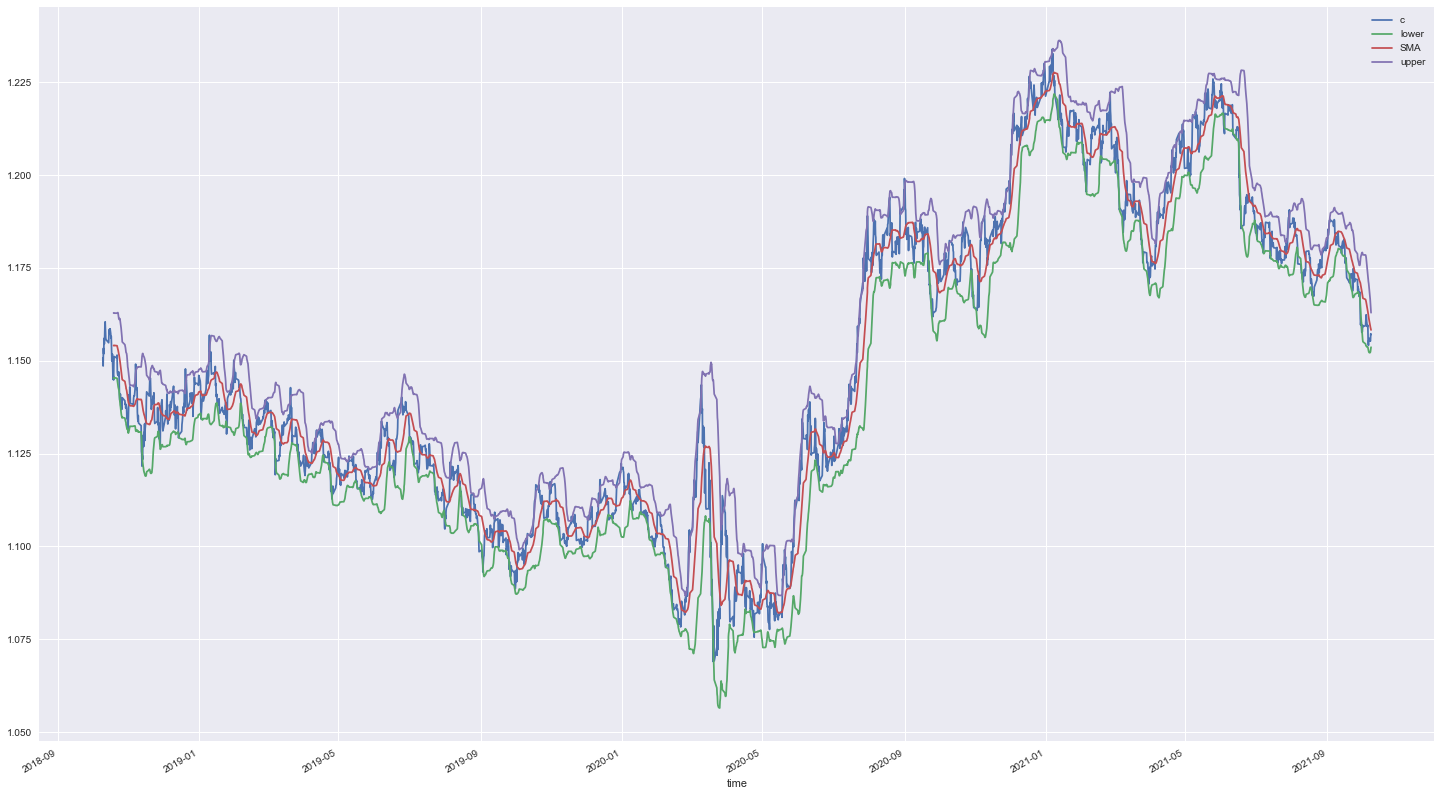

In [70]:
df[["c","lower","SMA","upper"]].plot(figsize=(25,15))

<AxesSubplot:xlabel='time'>

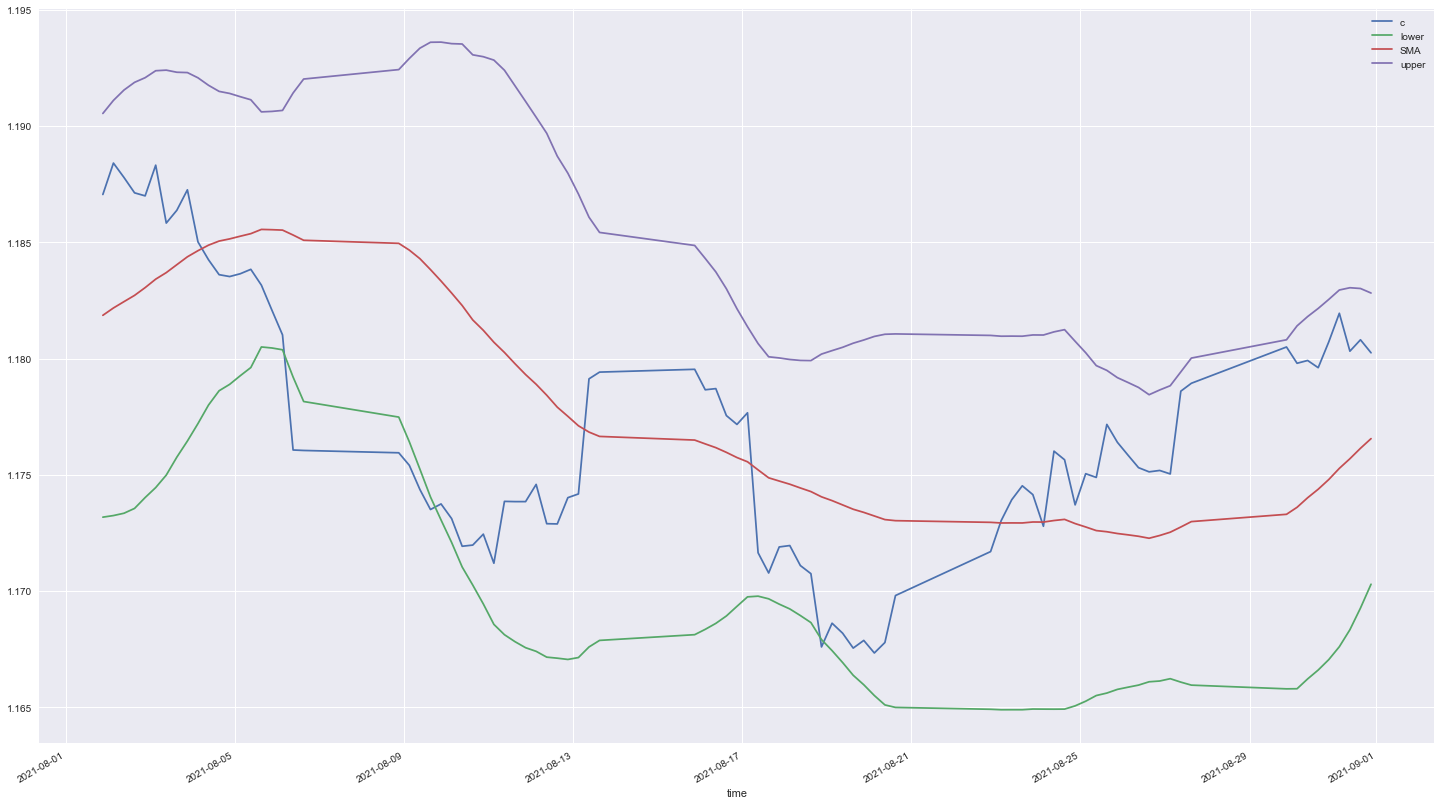

In [71]:
df[["c","lower","SMA","upper"]].loc["2021-08"].plot(figsize=(25,15))

In [72]:
df["posizione"]=np.where(df.c<df.lower,+1,np.nan)
df["posizione"]=np.where(df.c>df.upper,-1,df["posizione"])

In [73]:
df.loc["2021-08"].head(30)

c       SMA     devst     lower     upper  \
time                                                                   
2021-08-01 21:00:00  1.18706  1.181863  0.004341  1.173181  1.190545   
2021-08-02 03:00:00  1.18841  1.182178  0.004464  1.173250  1.191106   
2021-08-02 09:00:00  1.18779  1.182451  0.004550  1.173350  1.191552   
2021-08-02 15:00:00  1.18713  1.182720  0.004581  1.173558  1.191883   
2021-08-02 21:00:00  1.18700  1.183053  0.004514  1.174024  1.192082   
2021-08-03 03:00:00  1.18832  1.183418  0.004482  1.174454  1.192382   
2021-08-03 09:00:00  1.18583  1.183699  0.004354  1.174990  1.192408   
2021-08-03 15:00:00  1.18638  1.184040  0.004139  1.175763  1.192317   
2021-08-03 21:00:00  1.18726  1.184379  0.003962  1.176455  1.192303   
2021-08-04 03:00:00  1.18502  1.184642  0.003718  1.177207  1.192078   
2021-08-04 09:00:00  1.18425  1.184880  0.003438  1.178005  1.191755   
2021-08-04 15:00:00  1.18361  1.185056  0.003219  1.178618  1.191494   
2021-08-04 21:00:00  1.18353  1.185150  0.003128  1.178894  1.191406   
2021-08-05 03:00:00  1.18365  1.185265  0.003000  1.179264  1.191266   
2021-08-05 09:00:00  1.18384  1.185375  0.002879  1.179616  1.191133   
2021-08-05 15:00:00  1.18316  1.185557  0.002528  1.180502  1.190612   
2021-08-05 21:00:00  1.18208  1.185545  0.002544  1.180457  1.190633   
2021-08-06 03:00:00  1.18102  1.185528  0.002574  1.180380  1.190675   
2021-08-06 09:00:00  1.17607  1.185316  0.003054  1.179207  1.191425   
2021-08-06 15:00:00  1.17605  1.185090  0.003467  1.178155  1.192025   
2021-08-08 21:00:00  1.17595  1.184958  0.003736  1.177485  1.192431   
2021-08-09 03:00:00  1.17541  1.184666  0.004122  1.176421  1.192911   
2021-08-09 09:00:00  1.17437  1.184299  0.004527  1.175245  1.193352   
2021-08-09 15:00:00  1.17351  1.183829  0.004889  1.174051  1.193607   
2021-08-09 21:00:00  1.17375  1.183337  0.005138  1.173061  1.193613   
2021-08-10 03:00:00  1.17312  1.182821  0.005363  1.172094  1.193547   
2021-08-10 09:00:00  1.17193  1.182284  0.005624  1.171037  1.193531   
2021-08-10 15:00:00  1.17198  1.181664  0.005701  1.170261  1.193066   
2021-08-10 21:00:00  1.17245  1.181217  0.005884  1.169449  1.192985   
2021-08-11 03:00:00  1.17120  1.180704  0.006068  1.168569  1.192839   

                     posizione  
time                            
2021-08-01 21:00:00        NaN  
2021-08-02 03:00:00        NaN  
2021-08-02 09:00:00        NaN  
2021-08-02 15:00:00        NaN  
2021-08-02 21:00:00        NaN  
2021-08-03 03:00:00        NaN  
2021-08-03 09:00:00        NaN  
2021-08-03 15:00:00        NaN  
2021-08-03 21:00:00        NaN  
2021-08-04 03:00:00        NaN  
2021-08-04 09:00:00        NaN  
2021-08-04 15:00:00        NaN  
2021-08-04 21:00:00        NaN  
2021-08-05 03:00:00        NaN  
2021-08-05 09:00:00        NaN  
2021-08-05 15:00:00        NaN  
2021-08-05 21:00:00        NaN  
2021-08-06 03:00:00        NaN  
2021-08-06 09:00:00        1.0  
2021-08-06 15:00:00        1.0  
2021-08-08 21:00:00        1.0  
2021-08-09 03:00:00        1.0  
2021-08-09 09:00:00        1.0  
2021-08-09 15:00:00        1.0  
2021-08-09 21:00:00        NaN  
2021-08-10 03:00:00        NaN  
2021-08-10 09:00:00        NaN  
2021-08-10 15:00:00        NaN  
2021-08-10 21:00:00        NaN  
2021-08-11 03:00:00        NaN

In [74]:
df["posizione"]=np.where( np.sign(df.c-df.SMA)!=np.sign((df.c-df.SMA).shift(1)) , 0, df["posizione"] )

In [75]:
df.loc["2021-08"].head(30)

c       SMA     devst     lower     upper  \
time                                                                   
2021-08-01 21:00:00  1.18706  1.181863  0.004341  1.173181  1.190545   
2021-08-02 03:00:00  1.18841  1.182178  0.004464  1.173250  1.191106   
2021-08-02 09:00:00  1.18779  1.182451  0.004550  1.173350  1.191552   
2021-08-02 15:00:00  1.18713  1.182720  0.004581  1.173558  1.191883   
2021-08-02 21:00:00  1.18700  1.183053  0.004514  1.174024  1.192082   
2021-08-03 03:00:00  1.18832  1.183418  0.004482  1.174454  1.192382   
2021-08-03 09:00:00  1.18583  1.183699  0.004354  1.174990  1.192408   
2021-08-03 15:00:00  1.18638  1.184040  0.004139  1.175763  1.192317   
2021-08-03 21:00:00  1.18726  1.184379  0.003962  1.176455  1.192303   
2021-08-04 03:00:00  1.18502  1.184642  0.003718  1.177207  1.192078   
2021-08-04 09:00:00  1.18425  1.184880  0.003438  1.178005  1.191755   
2021-08-04 15:00:00  1.18361  1.185056  0.003219  1.178618  1.191494   
2021-08-04 21:00:00  1.18353  1.185150  0.003128  1.178894  1.191406   
2021-08-05 03:00:00  1.18365  1.185265  0.003000  1.179264  1.191266   
2021-08-05 09:00:00  1.18384  1.185375  0.002879  1.179616  1.191133   
2021-08-05 15:00:00  1.18316  1.185557  0.002528  1.180502  1.190612   
2021-08-05 21:00:00  1.18208  1.185545  0.002544  1.180457  1.190633   
2021-08-06 03:00:00  1.18102  1.185528  0.002574  1.180380  1.190675   
2021-08-06 09:00:00  1.17607  1.185316  0.003054  1.179207  1.191425   
2021-08-06 15:00:00  1.17605  1.185090  0.003467  1.178155  1.192025   
2021-08-08 21:00:00  1.17595  1.184958  0.003736  1.177485  1.192431   
2021-08-09 03:00:00  1.17541  1.184666  0.004122  1.176421  1.192911   
2021-08-09 09:00:00  1.17437  1.184299  0.004527  1.175245  1.193352   
2021-08-09 15:00:00  1.17351  1.183829  0.004889  1.174051  1.193607   
2021-08-09 21:00:00  1.17375  1.183337  0.005138  1.173061  1.193613   
2021-08-10 03:00:00  1.17312  1.182821  0.005363  1.172094  1.193547   
2021-08-10 09:00:00  1.17193  1.182284  0.005624  1.171037  1.193531   
2021-08-10 15:00:00  1.17198  1.181664  0.005701  1.170261  1.193066   
2021-08-10 21:00:00  1.17245  1.181217  0.005884  1.169449  1.192985   
2021-08-11 03:00:00  1.17120  1.180704  0.006068  1.168569  1.192839   

                     posizione  
time                            
2021-08-01 21:00:00        NaN  
2021-08-02 03:00:00        NaN  
2021-08-02 09:00:00        NaN  
2021-08-02 15:00:00        NaN  
2021-08-02 21:00:00        NaN  
2021-08-03 03:00:00        NaN  
2021-08-03 09:00:00        NaN  
2021-08-03 15:00:00        NaN  
2021-08-03 21:00:00        NaN  
2021-08-04 03:00:00        NaN  
2021-08-04 09:00:00        0.0  
2021-08-04 15:00:00        NaN  
2021-08-04 21:00:00        NaN  
2021-08-05 03:00:00        NaN  
2021-08-05 09:00:00        NaN  
2021-08-05 15:00:00        NaN  
2021-08-05 21:00:00        NaN  
2021-08-06 03:00:00        NaN  
2021-08-06 09:00:00        1.0  
2021-08-06 15:00:00        1.0  
2021-08-08 21:00:00        1.0  
2021-08-09 03:00:00        1.0  
2021-08-09 09:00:00        1.0  
2021-08-09 15:00:00        1.0  
2021-08-09 21:00:00        NaN  
2021-08-10 03:00:00        NaN  
2021-08-10 09:00:00        NaN  
2021-08-10 15:00:00        NaN  
2021-08-10 21:00:00        NaN  
2021-08-11 03:00:00        NaN

In [78]:
df["posizione"]=df.posizione.ffill()

In [79]:
df.loc["2021-08"].head(30)

c       SMA     devst     lower     upper  \
time                                                                   
2021-08-01 21:00:00  1.18706  1.181863  0.004341  1.173181  1.190545   
2021-08-02 03:00:00  1.18841  1.182178  0.004464  1.173250  1.191106   
2021-08-02 09:00:00  1.18779  1.182451  0.004550  1.173350  1.191552   
2021-08-02 15:00:00  1.18713  1.182720  0.004581  1.173558  1.191883   
2021-08-02 21:00:00  1.18700  1.183053  0.004514  1.174024  1.192082   
2021-08-03 03:00:00  1.18832  1.183418  0.004482  1.174454  1.192382   
2021-08-03 09:00:00  1.18583  1.183699  0.004354  1.174990  1.192408   
2021-08-03 15:00:00  1.18638  1.184040  0.004139  1.175763  1.192317   
2021-08-03 21:00:00  1.18726  1.184379  0.003962  1.176455  1.192303   
2021-08-04 03:00:00  1.18502  1.184642  0.003718  1.177207  1.192078   
2021-08-04 09:00:00  1.18425  1.184880  0.003438  1.178005  1.191755   
2021-08-04 15:00:00  1.18361  1.185056  0.003219  1.178618  1.191494   
2021-08-04 21:00:00  1.18353  1.185150  0.003128  1.178894  1.191406   
2021-08-05 03:00:00  1.18365  1.185265  0.003000  1.179264  1.191266   
2021-08-05 09:00:00  1.18384  1.185375  0.002879  1.179616  1.191133   
2021-08-05 15:00:00  1.18316  1.185557  0.002528  1.180502  1.190612   
2021-08-05 21:00:00  1.18208  1.185545  0.002544  1.180457  1.190633   
2021-08-06 03:00:00  1.18102  1.185528  0.002574  1.180380  1.190675   
2021-08-06 09:00:00  1.17607  1.185316  0.003054  1.179207  1.191425   
2021-08-06 15:00:00  1.17605  1.185090  0.003467  1.178155  1.192025   
2021-08-08 21:00:00  1.17595  1.184958  0.003736  1.177485  1.192431   
2021-08-09 03:00:00  1.17541  1.184666  0.004122  1.176421  1.192911   
2021-08-09 09:00:00  1.17437  1.184299  0.004527  1.175245  1.193352   
2021-08-09 15:00:00  1.17351  1.183829  0.004889  1.174051  1.193607   
2021-08-09 21:00:00  1.17375  1.183337  0.005138  1.173061  1.193613   
2021-08-10 03:00:00  1.17312  1.182821  0.005363  1.172094  1.193547   
2021-08-10 09:00:00  1.17193  1.182284  0.005624  1.171037  1.193531   
2021-08-10 15:00:00  1.17198  1.181664  0.005701  1.170261  1.193066   
2021-08-10 21:00:00  1.17245  1.181217  0.005884  1.169449  1.192985   
2021-08-11 03:00:00  1.17120  1.180704  0.006068  1.168569  1.192839   

                     posizione  
time                            
2021-08-01 21:00:00       -1.0  
2021-08-02 03:00:00       -1.0  
2021-08-02 09:00:00       -1.0  
2021-08-02 15:00:00       -1.0  
2021-08-02 21:00:00       -1.0  
2021-08-03 03:00:00       -1.0  
2021-08-03 09:00:00       -1.0  
2021-08-03 15:00:00       -1.0  
2021-08-03 21:00:00       -1.0  
2021-08-04 03:00:00       -1.0  
2021-08-04 09:00:00        0.0  
2021-08-04 15:00:00        0.0  
2021-08-04 21:00:00        0.0  
2021-08-05 03:00:00        0.0  
2021-08-05 09:00:00        0.0  
2021-08-05 15:00:00        0.0  
2021-08-05 21:00:00        0.0  
2021-08-06 03:00:00        0.0  
2021-08-06 09:00:00        1.0  
2021-08-06 15:00:00        1.0  
2021-08-08 21:00:00        1.0  
2021-08-09 03:00:00        1.0  
2021-08-09 09:00:00        1.0  
2021-08-09 15:00:00        1.0  
2021-08-09 21:00:00        1.0  
2021-08-10 03:00:00        1.0  
2021-08-10 09:00:00        1.0  
2021-08-10 15:00:00        1.0  
2021-08-10 21:00:00        1.0  
2021-08-11 03:00:00        1.0

In [80]:
df["posizione"]=df.posizione.fillna(0)

In [82]:
df.posizione.value_counts()

 0.0    1520
-1.0     822
 1.0     805
Name: posizione, dtype: int64

<AxesSubplot:xlabel='time'>

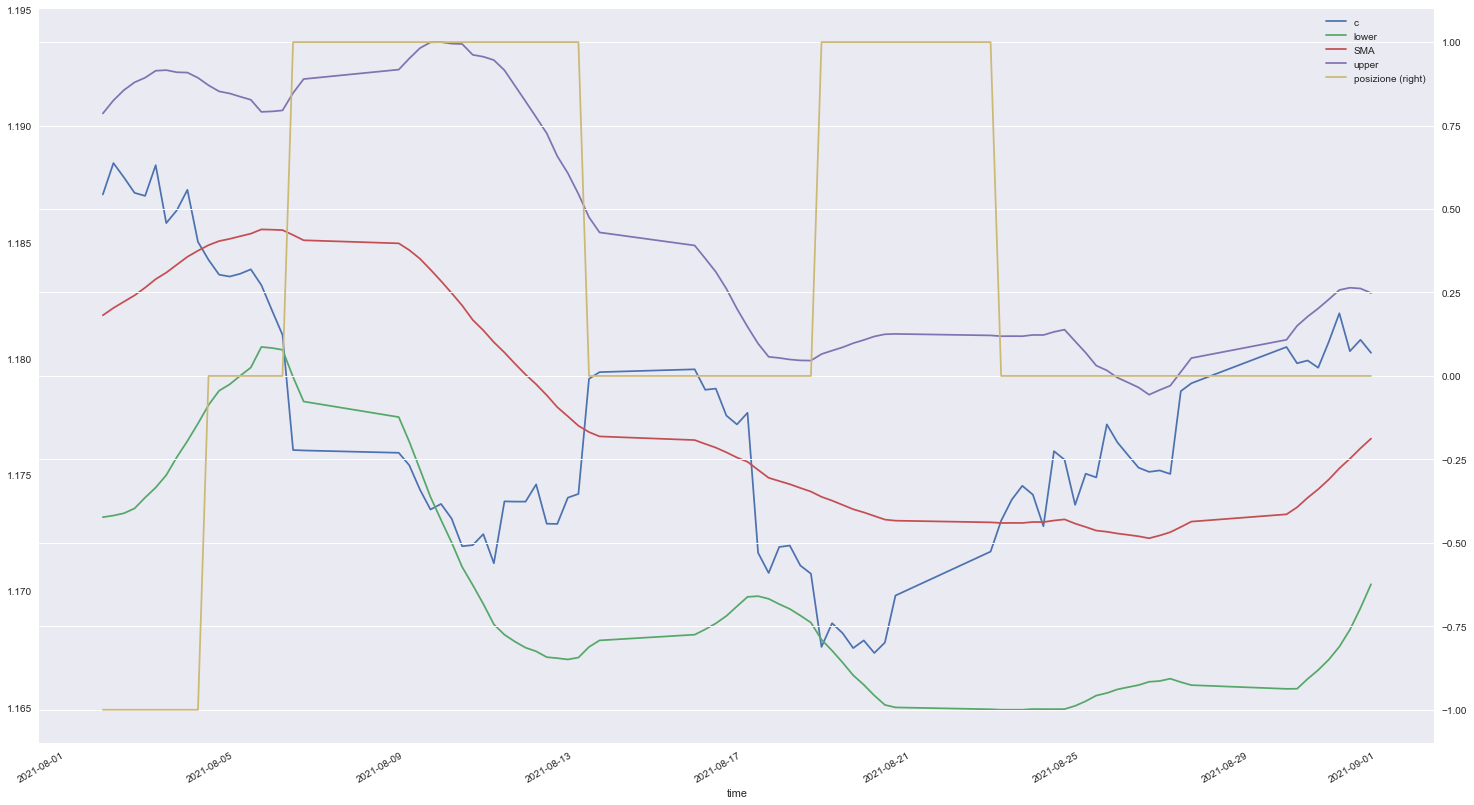

In [84]:
df[["c","lower","SMA","upper","posizione"]].loc["2021-08"].plot(figsize=(25,15),secondary_y="posizione")

<AxesSubplot:xlabel='time'>

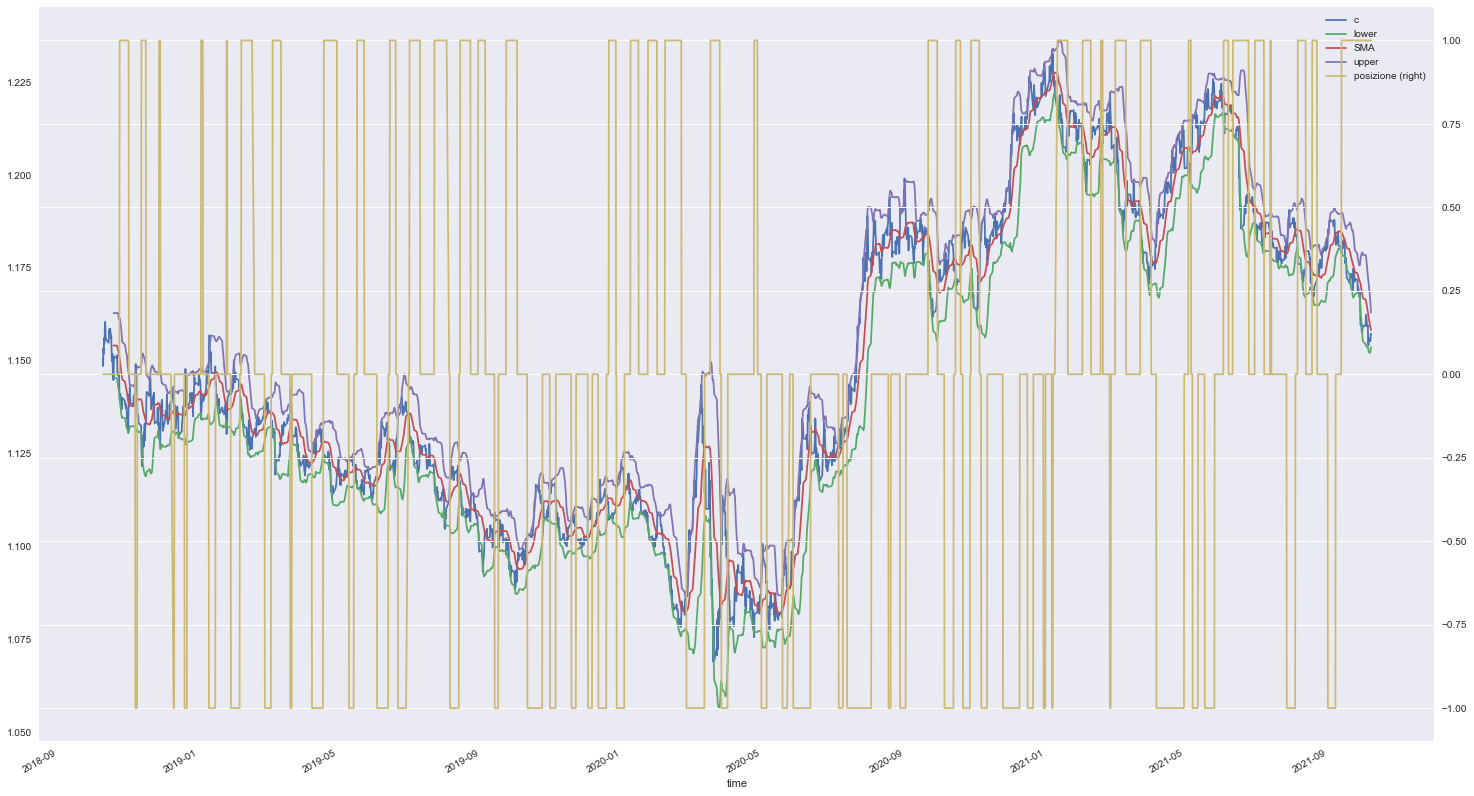

In [85]:
df[["c","lower","SMA","upper","posizione"]].plot(figsize=(25,15),secondary_y="posizione")

# Backtesting

In [88]:
df.columns

Index(['c', 'SMA', 'devst', 'lower', 'upper', 'posizione'], dtype='object')

In [90]:
df["logRet"]=np.log(df.c/df.c.shift(1))

In [91]:
df["strategia"]=df.posizione.shift(1)*df.logRet

In [92]:
df.strategia.sum()

0.04433306431585893

In [93]:
df.logRet.sum()

0.005485876611433446

<AxesSubplot:xlabel='time'>

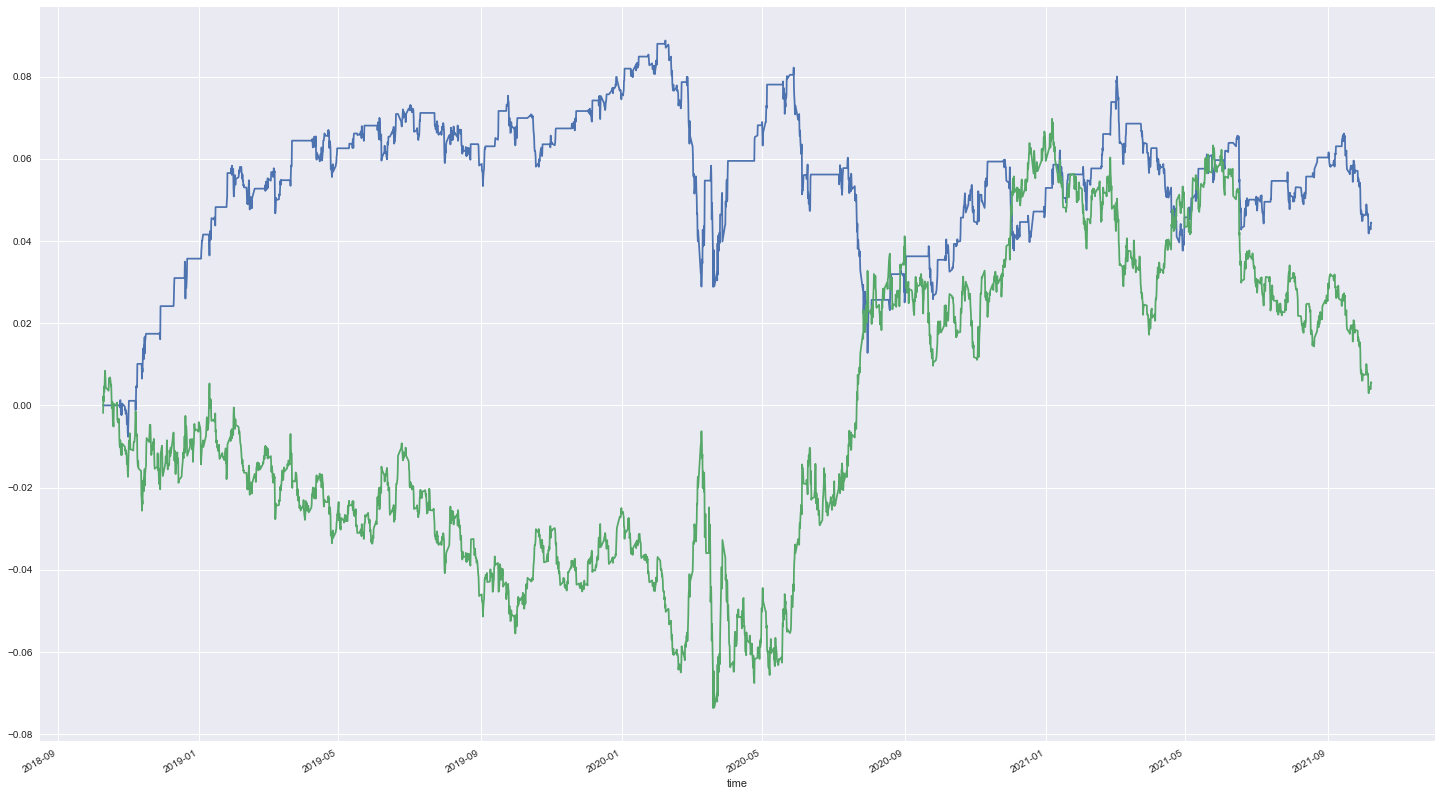

In [96]:
df.strategia.cumsum().plot(figsize=(25,15))
df.logRet.cumsum().plot()

In [97]:
comm=0.0
spread=0.00008/df.c.mean() 

In [100]:
df["transazioni"]=abs(df.posizione.shift(1)-df.posizione.shift(2))
# attenzione che questa volta la transazione usa MEZZO SPREAD perché soltanto vendiamo o compriamo, 
# non vendiamo due volte o comprimao due volte, tranne nel caso in cui il valore sia 2 perché passo da -1 a +1

In [101]:
df.head(50)

c       SMA     devst     lower     upper  \
time                                                                   
2018-10-09 21:00:00  1.15071       NaN       NaN       NaN       NaN   
2018-10-10 03:00:00  1.14857       NaN       NaN       NaN       NaN   
2018-10-10 09:00:00  1.15334       NaN       NaN       NaN       NaN   
2018-10-10 15:00:00  1.15184       NaN       NaN       NaN       NaN   
2018-10-10 21:00:00  1.15599       NaN       NaN       NaN       NaN   
2018-10-11 03:00:00  1.15450       NaN       NaN       NaN       NaN   
2018-10-11 09:00:00  1.15579       NaN       NaN       NaN       NaN   
2018-10-11 15:00:00  1.15927       NaN       NaN       NaN       NaN   
2018-10-11 21:00:00  1.16045       NaN       NaN       NaN       NaN   
2018-10-12 03:00:00  1.15861       NaN       NaN       NaN       NaN   
2018-10-12 09:00:00  1.15607       NaN       NaN       NaN       NaN   
2018-10-12 15:00:00  1.15567       NaN       NaN       NaN       NaN   
2018-10-14 21:00:00  1.15482       NaN       NaN       NaN       NaN   
2018-10-15 03:00:00  1.15718       NaN       NaN       NaN       NaN   
2018-10-15 09:00:00  1.15840       NaN       NaN       NaN       NaN   
2018-10-15 15:00:00  1.15776       NaN       NaN       NaN       NaN   
2018-10-15 21:00:00  1.15727       NaN       NaN       NaN       NaN   
2018-10-16 03:00:00  1.15859       NaN       NaN       NaN       NaN   
2018-10-16 09:00:00  1.15801       NaN       NaN       NaN       NaN   
2018-10-16 15:00:00  1.15734       NaN       NaN       NaN       NaN   
2018-10-16 21:00:00  1.15604       NaN       NaN       NaN       NaN   
2018-10-17 03:00:00  1.15652       NaN       NaN       NaN       NaN   
2018-10-17 09:00:00  1.15290       NaN       NaN       NaN       NaN   
2018-10-17 15:00:00  1.14991       NaN       NaN       NaN       NaN   
2018-10-17 21:00:00  1.14998       NaN       NaN       NaN       NaN   
2018-10-18 03:00:00  1.15172       NaN       NaN       NaN       NaN   
2018-10-18 09:00:00  1.14891       NaN       NaN       NaN       NaN   
2018-10-18 15:00:00  1.14508       NaN       NaN       NaN       NaN   
2018-10-18 21:00:00  1.14592       NaN       NaN       NaN       NaN   
2018-10-19 03:00:00  1.14480  1.154065  0.004390  1.145285  1.162845   
2018-10-19 09:00:00  1.14964  1.154030  0.004422  1.145185  1.162874   
2018-10-19 15:00:00  1.15112  1.154115  0.004338  1.145440  1.162790   
2018-10-21 21:00:00  1.15074  1.154028  0.004379  1.145269  1.162787   
2018-10-22 03:00:00  1.15151  1.154017  0.004385  1.145246  1.162788   
2018-10-22 09:00:00  1.14699  1.153717  0.004551  1.144616  1.162818   
2018-10-22 15:00:00  1.14631  1.153444  0.004744  1.143957  1.162931   
2018-10-22 21:00:00  1.14609  1.153121  0.004906  1.143309  1.162932   
2018-10-23 03:00:00  1.14660  1.152698  0.004904  1.142891  1.162506   
2018-10-23 09:00:00  1.14589  1.152213  0.004830  1.142553  1.161873   
2018-10-23 15:00:00  1.14697  1.151825  0.004765  1.142294  1.161356   
2018-10-23 21:00:00  1.14634  1.151501  0.004798  1.141906  1.161096   
2018-10-24 03:00:00  1.14157  1.151031  0.005059  1.140913  1.161148   
2018-10-24 09:00:00  1.13953  1.150521  0.005421  1.139679  1.161363   
2018-10-24 15:00:00  1.13901  1.149915  0.005661  1.138593  1.161237   
2018-10-24 21:00:00  1.14100  1.149335  0.005653  1.138029  1.160641   
2018-10-25 03:00:00  1.14090  1.148773  0.005625  1.137524  1.160023   
2018-10-25 09:00:00  1.13791  1.148128  0.005726  1.136676  1.159580   
2018-10-25 15:00:00  1.13737  1.147421  0.005700  1.136022  1.158820   
2018-10-25 21:00:00  1.13684  1.146715  0.005654  1.135408  1.158022   
2018-10-26 03:00:00  1.13788  1.146066  0.005507  1.135052  1.157080   

                     posizione    logRet  strategia  transazioni  
time                                                              
2018-10-09 21:00:00        0.0       NaN        NaN          NaN  
2018-10-10 03:00:00        0.0 -0.001861  -0.000000          0.0  
2018-10-10 09:

In [117]:
df["strategiaNetto"]=df.strategia-df.transazioni*(spread/2+comm)

In [118]:
df.head(50)

c       SMA     devst     lower     upper  \
time                                                                   
2018-10-09 21:00:00  1.15071       NaN       NaN       NaN       NaN   
2018-10-10 03:00:00  1.14857       NaN       NaN       NaN       NaN   
2018-10-10 09:00:00  1.15334       NaN       NaN       NaN       NaN   
2018-10-10 15:00:00  1.15184       NaN       NaN       NaN       NaN   
2018-10-10 21:00:00  1.15599       NaN       NaN       NaN       NaN   
2018-10-11 03:00:00  1.15450       NaN       NaN       NaN       NaN   
2018-10-11 09:00:00  1.15579       NaN       NaN       NaN       NaN   
2018-10-11 15:00:00  1.15927       NaN       NaN       NaN       NaN   
2018-10-11 21:00:00  1.16045       NaN       NaN       NaN       NaN   
2018-10-12 03:00:00  1.15861       NaN       NaN       NaN       NaN   
2018-10-12 09:00:00  1.15607       NaN       NaN       NaN       NaN   
2018-10-12 15:00:00  1.15567       NaN       NaN       NaN       NaN   
2018-10-14 21:00:00  1.15482       NaN       NaN       NaN       NaN   
2018-10-15 03:00:00  1.15718       NaN       NaN       NaN       NaN   
2018-10-15 09:00:00  1.15840       NaN       NaN       NaN       NaN   
2018-10-15 15:00:00  1.15776       NaN       NaN       NaN       NaN   
2018-10-15 21:00:00  1.15727       NaN       NaN       NaN       NaN   
2018-10-16 03:00:00  1.15859       NaN       NaN       NaN       NaN   
2018-10-16 09:00:00  1.15801       NaN       NaN       NaN       NaN   
2018-10-16 15:00:00  1.15734       NaN       NaN       NaN       NaN   
2018-10-16 21:00:00  1.15604       NaN       NaN       NaN       NaN   
2018-10-17 03:00:00  1.15652       NaN       NaN       NaN       NaN   
2018-10-17 09:00:00  1.15290       NaN       NaN       NaN       NaN   
2018-10-17 15:00:00  1.14991       NaN       NaN       NaN       NaN   
2018-10-17 21:00:00  1.14998       NaN       NaN       NaN       NaN   
2018-10-18 03:00:00  1.15172       NaN       NaN       NaN       NaN   
2018-10-18 09:00:00  1.14891       NaN       NaN       NaN       NaN   
2018-10-18 15:00:00  1.14508       NaN       NaN       NaN       NaN   
2018-10-18 21:00:00  1.14592       NaN       NaN       NaN       NaN   
2018-10-19 03:00:00  1.14480  1.154065  0.004390  1.145285  1.162845   
2018-10-19 09:00:00  1.14964  1.154030  0.004422  1.145185  1.162874   
2018-10-19 15:00:00  1.15112  1.154115  0.004338  1.145440  1.162790   
2018-10-21 21:00:00  1.15074  1.154028  0.004379  1.145269  1.162787   
2018-10-22 03:00:00  1.15151  1.154017  0.004385  1.145246  1.162788   
2018-10-22 09:00:00  1.14699  1.153717  0.004551  1.144616  1.162818   
2018-10-22 15:00:00  1.14631  1.153444  0.004744  1.143957  1.162931   
2018-10-22 21:00:00  1.14609  1.153121  0.004906  1.143309  1.162932   
2018-10-23 03:00:00  1.14660  1.152698  0.004904  1.142891  1.162506   
2018-10-23 09:00:00  1.14589  1.152213  0.004830  1.142553  1.161873   
2018-10-23 15:00:00  1.14697  1.151825  0.004765  1.142294  1.161356   
2018-10-23 21:00:00  1.14634  1.151501  0.004798  1.141906  1.161096   
2018-10-24 03:00:00  1.14157  1.151031  0.005059  1.140913  1.161148   
2018-10-24 09:00:00  1.13953  1.150521  0.005421  1.139679  1.161363   
2018-10-24 15:00:00  1.13901  1.149915  0.005661  1.138593  1.161237   
2018-10-24 21:00:00  1.14100  1.149335  0.005653  1.138029  1.160641   
2018-10-25 03:00:00  1.14090  1.148773  0.005625  1.137524  1.160023   
2018-10-25 09:00:00  1.13791  1.148128  0.005726  1.136676  1.159580   
2018-10-25 15:00:00  1.13737  1.147421  0.005700  1.136022  1.158820   
2018-10-25 21:00:00  1.13684  1.146715  0.005654  1.135408  1.158022   
2018-10-26 03:00:00  1.13788  1.146066  0.005507  1.135052  1.157080   

                     posizione    logRet  strategia  transazioni  \
time                                                               
2018-10-09 21:00:00        0.0       NaN        NaN          NaN   
2018-10-10 03:00:00        0.0 -0.001861  -0.000000          0.0   
2018-10-10

<AxesSubplot:xlabel='time'>

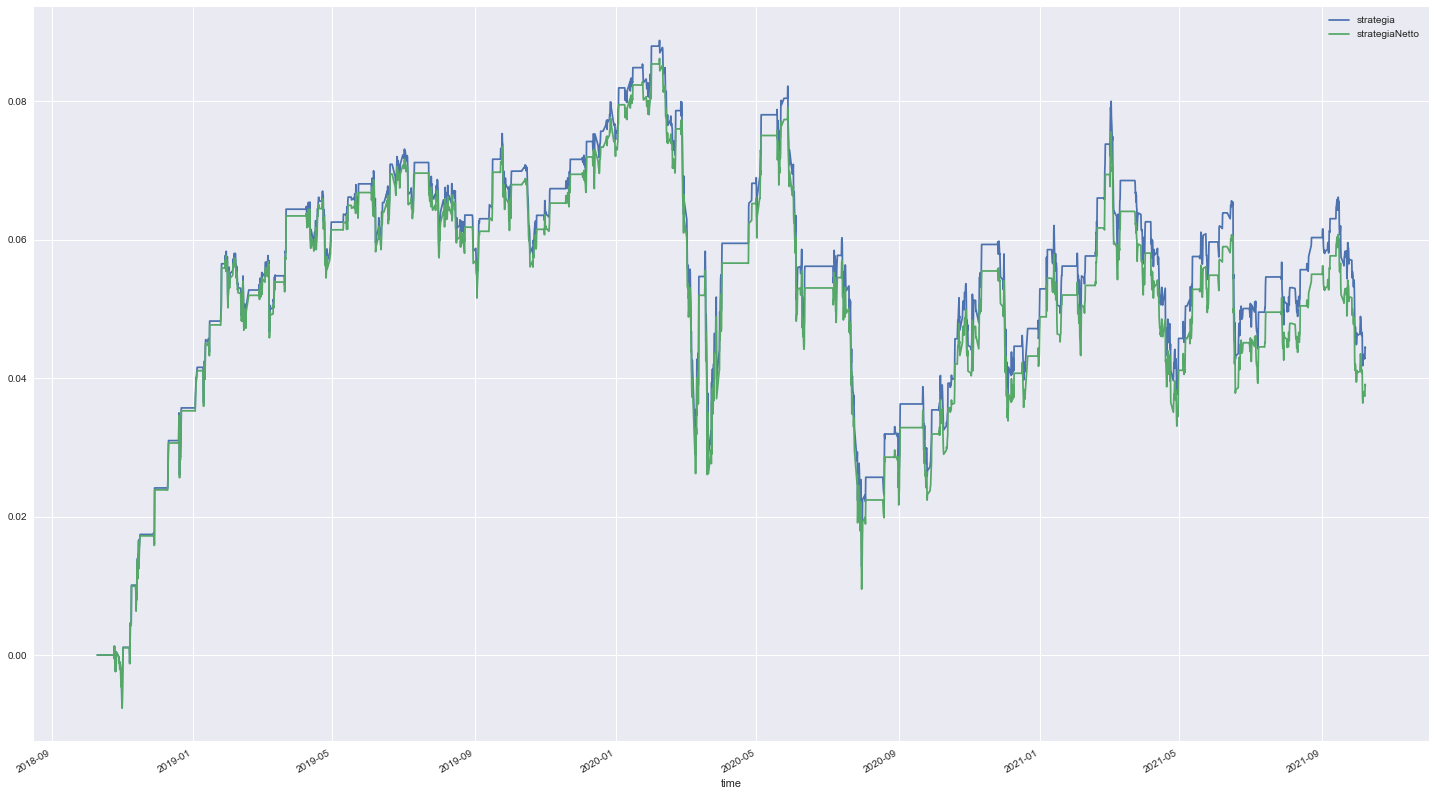

In [119]:
df[["strategia","strategiaNetto"]].cumsum().plot(figsize=(25,15))

In [120]:
df[["logRet","strategiaNetto"]].mean()*330

logRet            0.000575
strategiaNetto    0.004084
dtype: float64

In [121]:
df[["logRet","strategiaNetto"]].std()*np.sqrt(330)

logRet            0.035319
strategiaNetto    0.026200
dtype: float64

In [124]:
(df[["logRet","strategiaNetto"]].cumsum().cummax()-df[["logRet","strategiaNetto"]].cumsum()).max()

logRet            0.082075
strategiaNetto    0.076653
dtype: float64